## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propsensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency-inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
import networkx as nx
from networkx.algorithms import bipartite

%matplotlib inline

## Question 1
### Part 1: A naive analysis

In this part we will compare the distribution of the outcome variable (re78 column) using:
* Pandas' `describe` function to get a rough idea of the distribution (mainly mean, standard deviation, median and quantiles)
* Box plots
* Histograms

We didn't find any annotation regarding the meaning of zeros both in the web page on which the dataset was published and in the original paper we'll assume that they're not used to indicate missing data but that the subjects were unemployed.
In order to make plotting the data of the two groups easier we split the dataframe in two depending on the `treat` variable.

In [4]:
# load data
df = pd.read_csv('lalonde.csv')

# Create a new column for white subjects (anyone who is not hispanic or black)
df['white'] = ((df.black==0)&(df.hispan==0)).astype(int)

df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0


In [5]:
# Split into two dataframes to make plotting the two groups easier
treated = df[df.treat==1]
non_treated = df[df.treat==0]

In [6]:
pd.DataFrame({'Treated': treated.re78.describe(), 'Non treated': non_treated.re78.describe()})

,Non treated,Treated
count,429.000000,185.000000
mean,6984.169742,6349.143530
std,7294.161791,7867.402218
min,0.000000,0.000000
25%,220.181300,485.229800
50%,4975.505000,4232.309000
75%,11688.820000,9642.999000
max,25564.670000,60307.930000


We can see that the mean is greater than the median in both cases and that both the mean and the median are greater in the control group. There are many more subjects in the control group than in the treated group. We can also see that the lower and upper quantile are closer to the median in the treated group but the maximum income in the treated group is very large, more than twice as high as the highest value in the control group. The standard deviation of the data is very large (larger than the mean in both cases) but since the median and the mean do not coincide we can deduce that the distribution of the data is not symmetric and therefore not normal.

Since we assumed that a real earning of $0 means that the subject is unemployed we can also compute an unemployment rate for each group.

In [6]:
# Unemployment rate
print('Unemployment rate in the treated group:', (treated.re78==0).sum()/treated.re78.shape[0])
print('Unemployment rate in the control group:', (non_treated.re78==0).sum()/non_treated.re78.shape[0])

Unemployment rate in the treated group: 0.243243243243
Unemployment rate in the control group: 0.228438228438


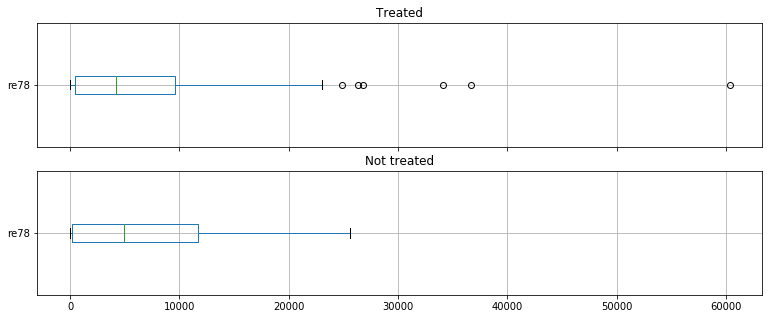

In [7]:
# boxplot of salaries of two groups
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
fig.set_size_inches((13,5))
ax1.set_title('Treated')
treated[['re78']].boxplot(vert=False, ax=ax1, showfliers=True)
ax2.set_title('Not treated')
non_treated[['re78']].boxplot(vert=False, ax=ax2, showfliers=True)

The box plots show us that while most of the real incomes of the treated groups tend to lie closer to the median, there are many more large outliers in that group than in the control group, as evidenced by the presence of multiple _fliers_.

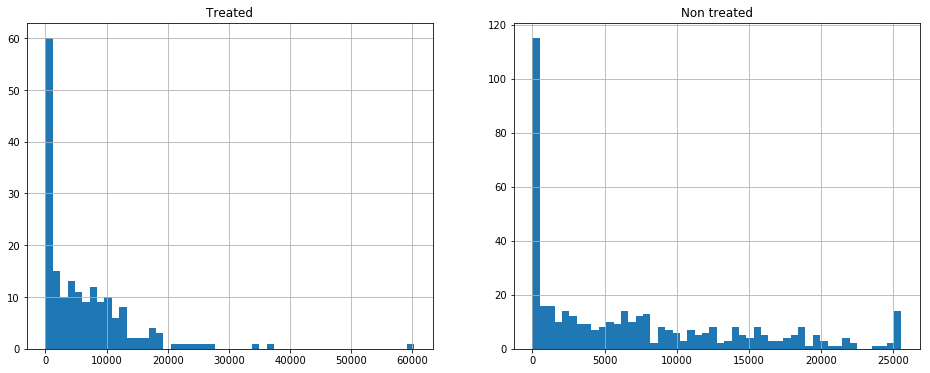

In [8]:
# histogram of salary for employed people in the two groups
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.set_title('Treated')
treated.re78.hist(ax=ax, bins=50)
ax = plt.subplot(122)
ax.set_title('Non treated')
non_treated.re78.hist(ax=ax, bins=50)

From these histograms we can clearly see that the distribution of the data is not normal and in fact it looks closer to a long-tailed distribution. We can use a log-log plot to verify whether the data follows a power law.

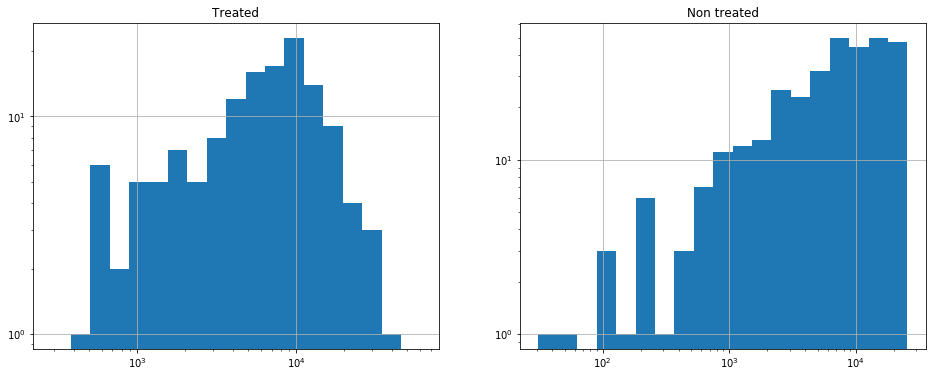

In [9]:
# log-log histogram
treated_no_zeros = treated[treated.re78 != 0]
non_treated_no_zeros = non_treated[non_treated.re78 != 0]

# Use custom bins for a logarithmic x axis
bins_treated = np.logspace(np.log10(min(treated_no_zeros.re78)), np.log10(max(treated_no_zeros.re78)), 20)
bins_non_treated = np.logspace(np.log10(min(non_treated_no_zeros.re78)), np.log10(max(non_treated_no_zeros.re78)), 20)

# Draw the plots
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
ax.set_title('Treated')
treated_no_zeros.re78.hist(ax=ax, log=True, bins=bins_treated)
ax.set_xscale('log')

ax = plt.subplot(122)
ax.set_title('Non treated')
non_treated_no_zeros.re78.hist(ax=ax, log=True, bins=bins_non_treated)
ax.set_xscale('log')

We can see that the data doesn't follow a power law, as the log-log plot doesn't display a linear decrease. We can also try to plot a histogram of the logarithm of the real incomes for both groups.

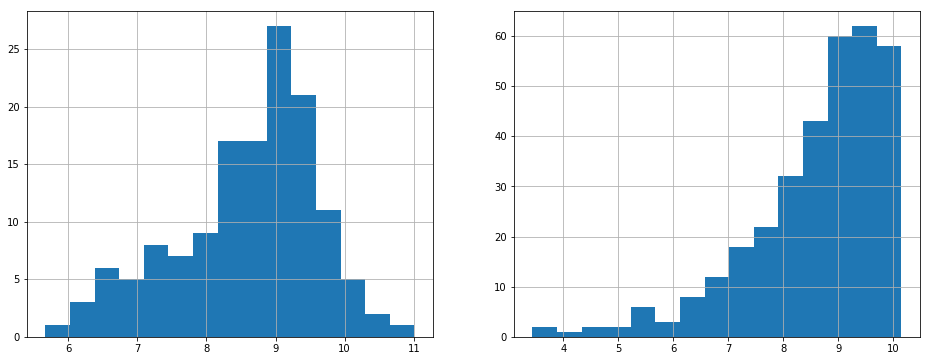

In [10]:
# histogram of log-salary
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(121)
np.log(treated_no_zeros.re78).hist(ax=ax, bins=15)
ax = plt.subplot(122)
np.log(non_treated_no_zeros.re78).hist(ax=ax, bins=15)

### Observations
The median salary of the treated groups is lower than that of the control group by about $600 which could suggest at the treatment is not helpful but on the contrary it tends to make the subjects perform worse. Another significant difference between the groups is that the treated groups has many outliers with very large income that are absent from the control group.

### Part 2: A closer look at the data
We will now compare the distribution of the other features in the two groups by plotting a histogram or pie chart for each group and feature: in order for the experiment to be meaningful all features need to have the same distriution in both groups.

First of all let's define some visualization helper functions.

In [13]:
def pie_treated_vs_control(treated_series, control_series, control_name, **kwargs):
    """Compare the value frequencies of two series using pie charts"""
    
    # Combining the two series in a single DataFrame produces more consistent coloring
    comp_df = pd.DataFrame({'Treated': treated_series, control_name: control_series})
    comp_df.plot.pie(**kwargs)

In [14]:
def hist_treated_vs_control(treated_series, control_series, title, control_name, ax=None):
    """Compare the value frequencies of two series using histograms"""
    if ax is None:
        _, ax = plt.subplots()
    
    ax.hist([treated_series.values, control_series.values],
            weights = [[1/len(treated_series)]*len(treated_series),
                       [1/len(control_series)]*len(control_series)],
            label=['Treated', control_name])
    
    ax.legend(prop={'size': 10})
    ax.set_title(title)
    ax.set_ylabel('Density')

In [15]:
def feature_comparison(treated_df, control_df, control_title):
    treated_race = (treated_df.black + 2 * treated_df.hispan).replace({0: 'White', 1: 'Black', 2: 'Hispanic'})
    control_race = (control_df.black + 2 * control_df.hispan).replace({0: 'White', 1: 'Black', 2: 'Hispanic'})
    pie_treated_vs_control(treated_race.value_counts(), control_race.value_counts(), control_title,
                            subplots=True, title='Race', legend=False)
    
    treated_married = treated_df.married.replace({0: 'Not married', 1: 'Married'})
    control_married = control_df.married.replace({0: 'Not married', 1: 'Married'})
    pie_treated_vs_control(treated_married.value_counts(), control_married.value_counts(), control_title,
                             subplots=True, legend=False, title='Marital status')
    
    treated_nodegree = treated_df.nodegree.replace({0: 'Degree', 1: 'No degree'})
    control_nodegree = control_df.nodegree.replace({0: 'Degree', 1: 'No degree'})
    pie_treated_vs_control(treated_nodegree.value_counts(), control_nodegree.value_counts(), control_title,
                            subplots=True, legend=False, title='Higher education')
    
    fig = plt.figure(figsize=(13, 8))
    ax1, ax2 = plt.subplot(221), plt.subplot(222)
    ax3, ax4 = plt.subplot(223), plt.subplot(224)
    hist_treated_vs_control(treated_df.age, control_df.age, 'Age', control_title, ax=ax1)
    hist_treated_vs_control(treated_df.educ, control_df.educ, 'Length of education in years', control_title, ax=ax2)
    hist_treated_vs_control(treated_df.re74, control_df.re74, 'Real income in 1974', control_title, ax=ax3)
    hist_treated_vs_control(treated_df.re75, control_df.re75, 'Real income in 1975', control_title, ax=ax4)

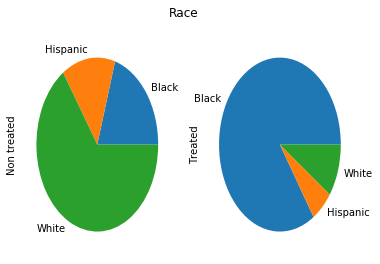

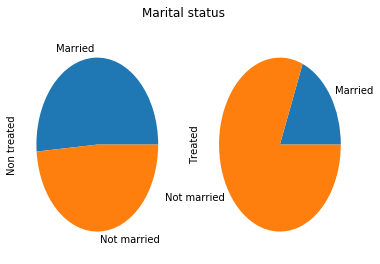

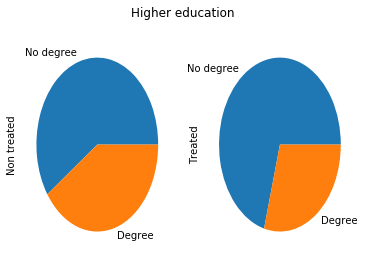

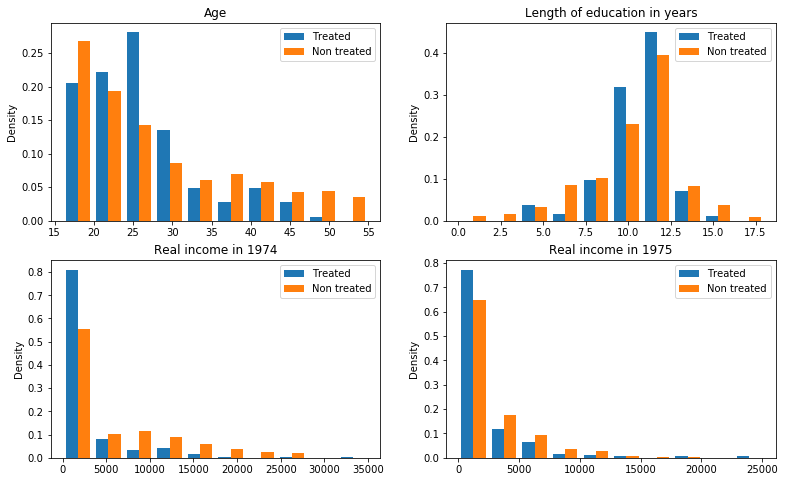

In [16]:
feature_comparison(treated, non_treated, 'Non treated')

#### Observations
It's clear that the test subjects are not well matched between the two groups, and this is especially evident when comparing the distribution of feature like race and marital status. Therefore it can be argued that any results obtained by simply comparing the treated group with the control group are invalid because any differences could be due to factors other than the treatment itself.

### Part 3: A propsensity score model

We'll use logistic regression to compute a propensity score based on all pre-treatment features for all subjects. This is an estimation of the probability that a subject will receive the treatment. We need to use one-hot encoding (i.e. encode each of them using a group of binary features, with only one active at a time for each group). In this case the only columns that we need to add are a `degree` column, the complimentary of `nodegree` and a `non_married`, complimentary of `married`, because the subjects' race is already using one-hot encoding.

In [10]:
df['degree'] = 1 - df.nodegree
df['non_married'] = 1 - df.married

tx = df[['age', 'educ', 'black', 'hispan', 'white', 'non_married', 'married', 'degree', 'nodegree', 're74', 're75']]
y = df['treat']

# Fit a logistic model to the data
logistic = linear_model.LogisticRegression()

logistic.fit(tx, y)
prop_score = logistic.predict_proba(tx)

with_propensity = df.copy()
with_propensity['propensity_score'] = prop_score[..., 1]

treated_with_propensity = with_propensity[with_propensity.treat == 1]
non_treated_with_propensity = with_propensity[with_propensity.treat == 0]

In [11]:
with_propensity.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,degree,non_married,propensity_score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0,0,0,0.460341
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0,0,1,0.320438
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0,1,1,0.637193
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0,0,1,0.673346
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0,0,1,0.679717


We will now create an undirected graph where each node corresponds to a subject in the experiment such that the edges of the graph only connect subjects of two different groups, never two of the same group. This is known as a _bipartite graph_.

After that we will assign to each edge a weight equal to minus the absolute value of the difference in propensity score of the nodes it connects. This way we'll be able to to select the best candidates for our new control group by selecting the set of edges that maximize the sum of their weights (implemented in NetworkX as `max_weight_matching`).

For this to work it is important that each node is connected to each member of the opposite group by exactly one edge (_complete bipartite graph_).

In [11]:
def make_propensity_graph(treated_df, control_df):
    treated_len = treated_df.shape[0]
    non_treated_len = non_treated_with_propensity.shape[0]
    
    # Create a complete bipartite graph
    G = nx.complete_bipartite_graph(treated_len, non_treated_len)
    
    set_edge_weights(G, treated_df, control_df)
    return G

In [12]:
def set_edge_weights(G, treated_df, control_df):
    treated_len = treated_df.shape[0]
    weights = {}

    # Compute a weight for each edge
    for edge in G.edges():
        edge_wt = treated_df.iloc[edge[0]]['propensity_score'] - \
            control_df.iloc[edge[1] - treated_len]['propensity_score']
            
        # The algorithm *maximizes* the sum of the weights and we want the
        # difference in propensity score to be as small as possible so we
        # need to use negative values
        weights[edge] = -abs(edge_wt)

    # The algorithm requires each edge to have a 'weight' attribute
    nx.set_edge_attributes(G, weights, 'weight')
    

In [13]:
def make_matched_control_group(G, treated_df, control_df):
    treated_len = treated_df.shape[0]
    
    # Returns a dictionary mapping nodes to nodes
    match = nx.max_weight_matching(G, maxcardinality=True)
    
    # Unfortunately
    return pd.DataFrame([
       control_df.iloc[match[i] - treated_len] for i in range(treated_len) if i in match
    ])

In [30]:
graph = make_propensity_graph(treated_with_propensity, non_treated_with_propensity)

In [77]:
control_match = make_matched_control_group(graph, treated_with_propensity, non_treated_with_propensity)

In [167]:
control_match.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,degree,non_married,propensity_score
392,PSID208,0,16,9,0,0,0,1,0.00,1188.7740,2451.548,1,0,1,0.178347
243,PSID59,0,36,12,1,0,1,0,11040.47,6221.3710,7215.739,0,1,0,0.320331
609,PSID425,0,18,11,0,0,0,1,0.00,0.0000,10150.500,1,0,1,0.158035
561,PSID377,0,16,9,0,0,0,1,0.00,0.0000,4974.028,1,0,1,0.171952
445,PSID261,0,16,9,0,0,0,1,0.00,320.4677,3707.616,1,0,1,0.173658


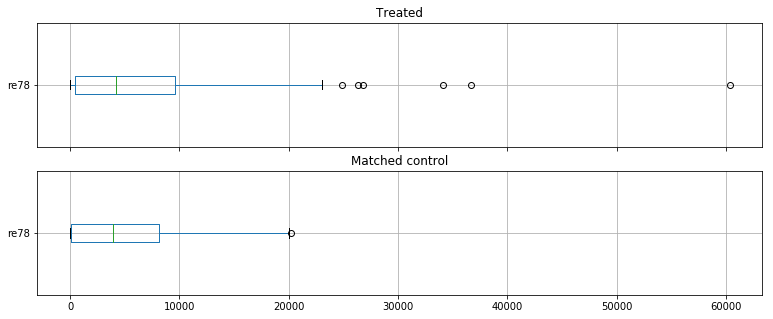

In [143]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
fig.set_size_inches((13,5))
ax1.set_title('Treated')
treated[['re78']].boxplot(vert=False, ax=ax1, showfliers=True)
ax2.set_title('Matched control')
control_match[['re78']].boxplot(vert=False, ax=ax2, showfliers=True)

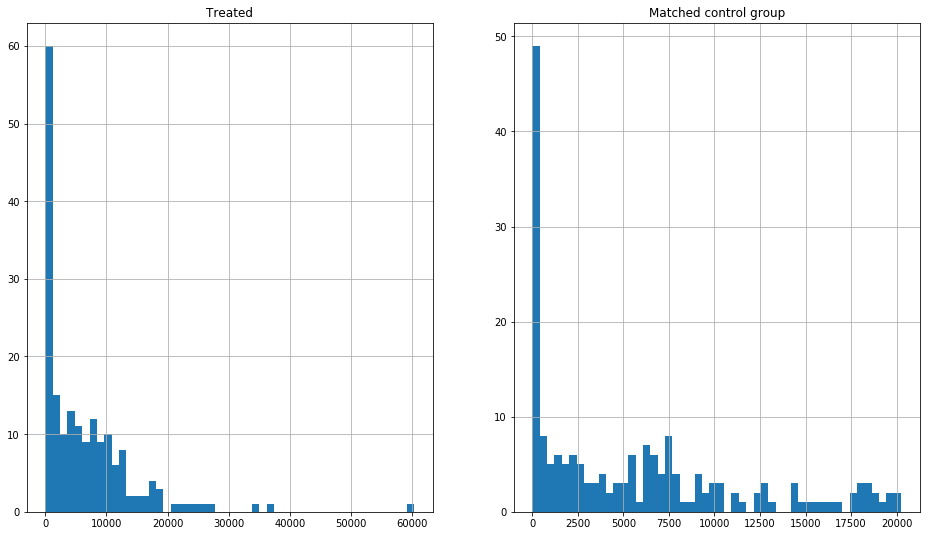

In [144]:
fig = plt.figure(figsize=(16,9))
ax = plt.subplot(121)
ax.set_title('Treated')
treated.re78.hist(ax=ax, bins=50)
ax = plt.subplot(122)
ax.set_title('Matched control group')
control_match.re78.hist(ax=ax, bins=50)

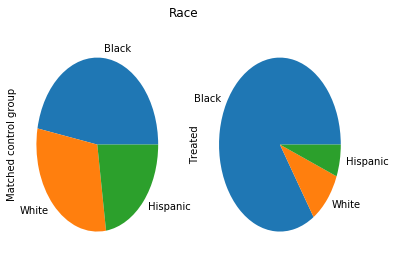

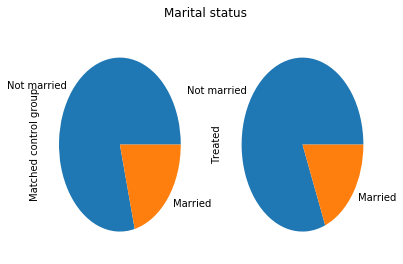

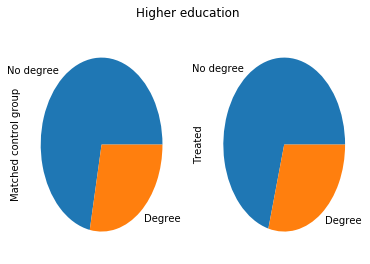

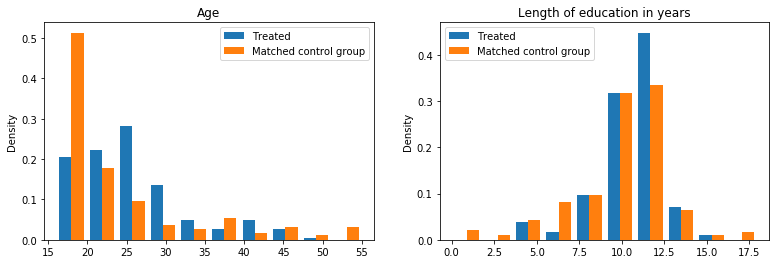

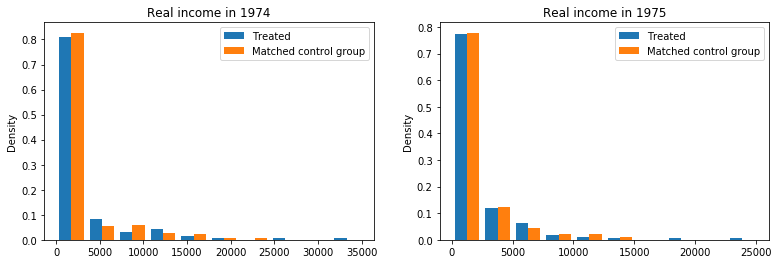

In [79]:
feature_comparison(treated, control_match, 'Matched control group')


#### Part 5

In [15]:
def prune_edges(G, treated_df, control_df):
    G2 = G.copy()
    treated_len = treated_df.shape[0]
    control_len = control_df.shape[0]
    
    # All edges that connect two subjects
    edges_to_remove = [
        (i, j + treated_len)
        for i in range(treated_len)
        for j in range(control_len)
        if treated_df.black.iloc[i] != control_df.black.iloc[j] or
           treated_df.hispan.iloc[i] != control_df.hispan.iloc[j]# or
           #treated_df.age.iloc[i] != control_df.age.iloc[j]
    ]

    G2.remove_edges_from(edges_to_remove)
    
    return G2

In [42]:
def apply_penalties(G, treated_df, control_df):
    G2 = G.copy()
    treated_len = treated_df.shape[0]
    weights = nx.get_edge_attributes(G2, 'weight')
    
    #print(weights.keys())

    new_weights = {
        k: (-50 if treated_df.black.iloc[k[0]] != control_df.black.iloc[k[1] - treated_len] or
           treated_df.hispan.iloc[k[0]] != control_df.hispan.iloc[k[1] - treated_len]
        else v)
        for k, v in weights.items()
    }

    # The algorithm requires each edge to have a 'weight' attribute
    nx.set_edge_attributes(G2, new_weights, 'weight')
    return G2

In [43]:
graph2 = apply_penalties(graph, treated_with_propensity, non_treated_with_propensity)

In [34]:
graph2.size()

79365

In [44]:
control_match_2 = make_matched_control_group(graph2, treated_with_propensity, non_treated_with_propensity)

In [36]:
control_match_2.shape[0]

185

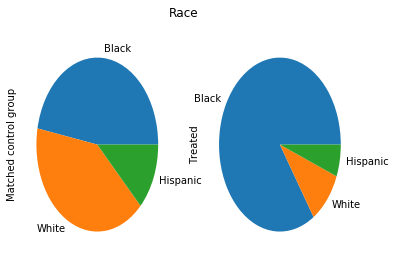

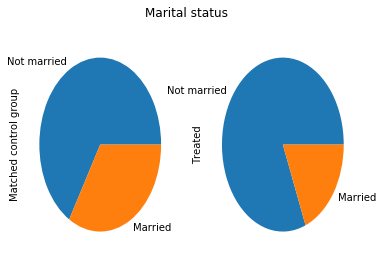

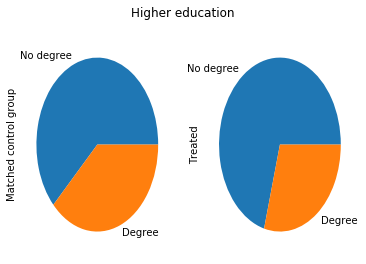

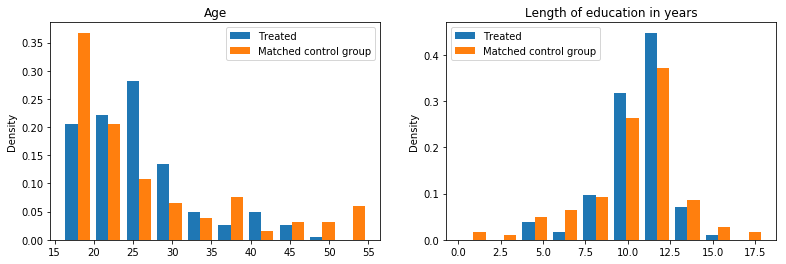

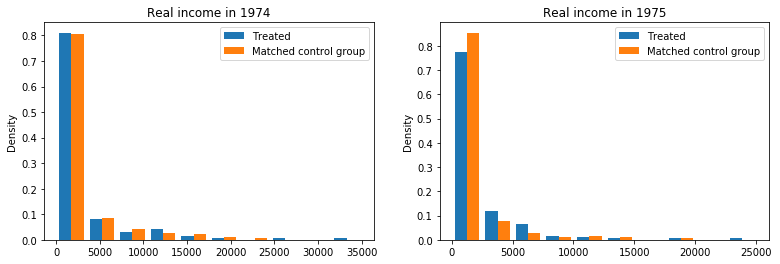

In [45]:
feature_comparison(treated, control_match_2, 'Matched control group')

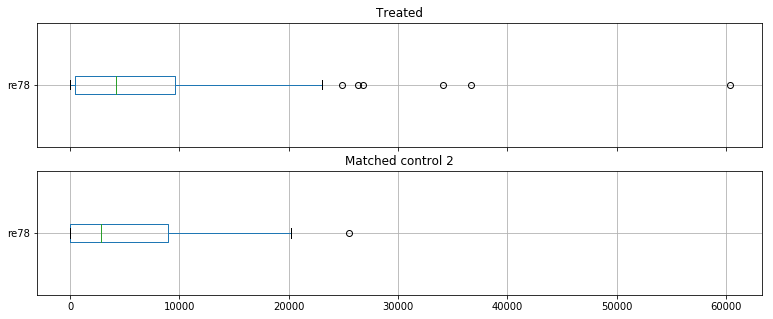

In [100]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
fig.set_size_inches((13,5))
ax1.set_title('Treated')
treated[['re78']].boxplot(vert=False, ax=ax1, showfliers=True)
ax2.set_title('Matched control 2')
control_match_2[['re78']].boxplot(vert=False, ax=ax2, showfliers=True)

## Question 2

### Part 1
Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency-inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
# Fetch the dataset and put it in a dataframe
twenty_news = fetch_20newsgroups(subset = 'all')
news = pd.DataFrame({'Document': twenty_news.data,
                     'Label':    twenty_news.target})
news.Label.replace(range(20), twenty_news.target_names, inplace=True)
news.head()

,Document,Label
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware


In [21]:
print(news[news.Label=='comp.graphics'].iloc[5,0])

From: dgf1@ellis.uchicago.edu (David Farley)
Subject: Re: Photoshop for Windows
Reply-To: dgf1@midway.uchicago.edu
Organization: University of Chicago
Lines: 37

In article <1r85m2$k66@agate.berkeley.edu> aron@tikal.ced.berkeley.edu (Aron Bonar) writes:
>In article <1993Apr22.011720.28958@midway.uchicago.edu>, dgf1@quads.uchicago.edu (David Farley) writes:
>|> In article <C5uHIM.JFq@rot.qc.ca> beaver@rot.qc.ca (Andre Boivert) writes:
>|> >
>|> >
>|> >I am looking for comments from people who have used/heard about PhotoShop
>|> >for Windows. Is it good? How does it compare to the Mac version? Is there
>|> >a lot of bugs (I heard the Windows version needs "fine-tuning)?
>|> >
>|> >Any comments would be greatly appreciated..
>|> >
>|> >Thank you.
>|> >
>|> >Andre Boisvert
>|> >beaver@rot.qc.ca
>|> >
>|> An review of both the Mac and Windows versions in either PC Week or Info
>|> World this week, said that the Windows version was considerably slower
>|> than the Mac.  A more useful compari

In [57]:
# Split the dataset/dataframe into train, valid, and test set
train, testval = train_test_split(news, test_size=0.2)
test, valid = train_test_split(testval, test_size=0.5)

In [82]:
# Compute TF-IDF feature of every document
#from nltk.corpus import stopwords
#count_vect = TfidfVectorizer(stop_words='english')
#StopWords = set(stopwords.words('english'))
count_vect = TfidfVectorizer()

In [83]:
X_train_counts = count_vect.fit_transform(train.Document)
X_valid_counts = count_vect.transform(valid.Document)
X_test_counts = count_vect.transform(test.Document)

In [84]:
# Have a look at the first training document
token_map = count_vect.get_feature_names()
feature = X_train_counts[0,:].toarray().flatten()
index = np.argsort(feature)
print('Top 10 tokens with largest TF-IDF:\n')
print('{:<20} {}'.format('Token', 'TF-IDF'))
for i in range(-1,-10,-1):
    print('{:<20} {}'.format(token_map[index[i]], feature[index[i]]))
print('\nTarget:', train.Label.iloc[0])
print('Document:\n')
print(train.Document.iloc[0])

Top 10 tokens with largest TF-IDF:

Token                TF-IDF
netware              0.3965081164489457
286a                 0.25639624651370324
sft                  0.24592464586427598
0a                   0.2026922878675458
level                0.1995098640643938
286                  0.1972493183134798
drive                0.19438882793331042
serialisation        0.19229718488527744
ii                   0.17663025170533675

Target: comp.sys.ibm.pc.hardware
Document:

Subject: Netware Server 286A and SFT Netware 286 Level II V2.0a serialisation
From: system@codewks.nacjack.gen.nz (Wayne McDougall)
Organization: The Code Works Limited, PO Box 10 155, Auckland, New Zealand
Lines: 60

Facts:
=====
- A Netware Server 286A was roughly moved to a new location and left powered
down for three months.
- From memory it has an 80 MB hard drive.
- Manuals and original disks are for SFT Netware 286 Level II V2.0a
- When powered up, the CMOS was wiped. A technician examined it and 
pronounced the d

### Part 2
Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

In [59]:
# Values of parameters to test
params_grid = {"n_estimators" : [10],
              "max_depth" : [None]}

# Initialize classifier and varibles to store the results
rfc = RandomForestClassifier()
best_score, best_params = 0, None

# Use ParameterGrid() to create all combinations of settings
for kwarg in ParameterGrid(params_grid):
    rfc.set_params(**kwarg)
    rfc.fit(X_train_counts, train.Label)
    predicted = rfc.predict(X_valid_counts)
    score = accuracy_score(valid.Label, predicted)
    
    # Keep the best setting
    if(score>best_score):
        best_score, best_params = score, kwarg
    print('Score: {:.10f}, Parameters: {}'.format(score, kwarg))

print('\nBest settings:')
print('Score: {:.10f}, Parameters: {}'.format(best_score, best_params))

Score: 0.7411140584, Parameters: {'max_depth': None, 'n_estimators': 10}

Best settings:
Score: 0.7411140584, Parameters: {'max_depth': None, 'n_estimators': 10}


In [51]:
from scipy.sparse import vstack
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# best_params = {"n_estimators" : 10, "max_depth" : None}

In [85]:
# Create a classifier with parameters obtained from grid search
rfc = RandomForestClassifier(**best_params)

# Train on the union of train and valid set
rfc.fit(vstack([X_train_counts, X_valid_counts]),
        pd.concat([train.Label, valid.Label]))

# Predict on test set
predicted = rfc.predict(X_test_counts)
accuracy_score(test.Label, predicted)

0.65994694960212197

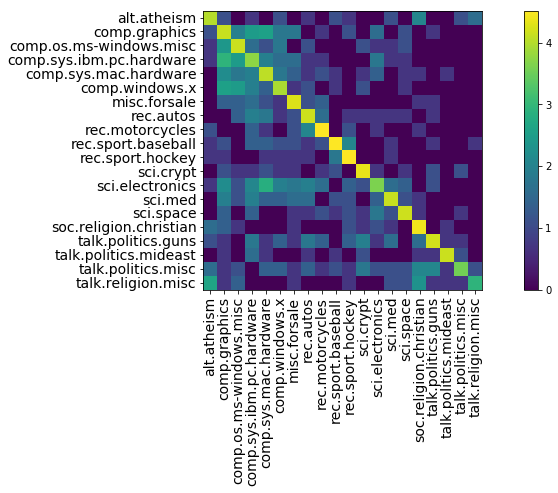

In [86]:
# Plot confusion matrix
cm = confusion_matrix(test.Label, predicted)
ax = plt.matshow(np.log(cm+1))
plt.gcf().set_size_inches((15,5))
plt.xticks(range(20), twenty_news.target_names, rotation=90, fontsize=14)
plt.yticks(range(20), twenty_news.target_names, fontsize=14)
plt.gca().xaxis.set_ticks_position('bottom')
_=plt.colorbar()

In [140]:
# Investigate feature importance
index = np.argsort(rfc.feature_importances_)[::-1]
importance = rfc.feature_importances_
importance_std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
                        axis=0)
for i in range(index.shape[0]-20, index.shape[0]):
    print('Importance: {:.6f} +- {:.6f}, {}'.format(importance[index[i]],
                                                    importance_std[index[i]],
                                                    token_map[index[i]]))

Importance: 0.000000 +- 0.000000, mnc
Importance: 0.000000 +- 0.000000, mnbv
Importance: 0.000000 +- 0.000000, mnemosyn
Importance: 0.000000 +- 0.000000, mnet
Importance: 0.000000 +- 0.000000, mneu
Importance: 0.000000 +- 0.000000, mnf
Importance: 0.000000 +- 0.000000, mng
Importance: 0.000000 +- 0.000000, mng1
Importance: 0.000000 +- 0.000000, mngf
Importance: 0.000000 +- 0.000000, mngqq
Importance: 0.000000 +- 0.000000, mngu
Importance: 0.000000 +- 0.000000, mngvzneu
Importance: 0.000000 +- 0.000000, mnh
Importance: 0.000000 +- 0.000000, mnha
Importance: 0.000000 +- 0.000000, mnhcc
Importance: 0.000000 +- 0.000000, mnhsuolm2v
Importance: 0.000000 +- 0.000000, mni
Importance: 0.000000 +- 0.000000, mniederb
Importance: 0.000000 +- 0.000000, mnk
Importance: 0.000000 +- 0.000000, hrd7d


In [139]:
# Feature selection based on importance
from sklearn.feature_selection import SelectFromModel

In [130]:
sfm = SelectFromModel(rfc, threshold='mean')
sfm.fit(X_train_counts, train.Label)
sel_train = sfm.transform(X_train_counts)
sel_valid = sfm.transform(X_valid_counts)
sel_test = sfm.transform(X_test_counts)

In [128]:
lst = sfm.get_support(indices=True)
lst.shape, len(token_map)
# for feature_list_index in sfm.get_support(indices=True):
#     print(token_map[feature_list_index])

((14723,), 155674)

In [116]:
#sel = SelectKBest(chi2, k=7000)
sel = VarianceThreshold(threshold=(.001))
sel_train = sel.fit_transform(X_train_counts, train.Label)
sel_valid = sel.transform(X_valid_counts)
sel_test = sel.transform(X_test_counts)

In [131]:
# Create a classifier with parameters obtained from grid search
sel_rfc = RandomForestClassifier(**best_params)

# Train on the union of train and valid set
sel_rfc.fit(vstack([sel_train, sel_valid]),
            pd.concat([train.Label, valid.Label]))

# Predict on test set
predicted = sel_rfc.predict(sel_test)
accuracy_score(test.Label, predicted)

0.70238726790450934

In [138]:
# Investigate feature importance
sel_index = sfm.get_support(indices=True)
index = np.argsort(sel_rfc.feature_importances_)[::-1]
importance = sel_rfc.feature_importances_
importance_std = np.std([tree.feature_importances_ for tree in sel_rfc.estimators_],
                        axis=0)
for i in range(index.shape[0]-20, index.shape[0]):
    print('Importance: {:.6f} +- {:.6f}, {}'.format(importance[index[i]],
                                                    importance_std[index[i]],
                                                    token_map[sel_index[index[i]]]))

Importance: 0.000000 +- 0.000000, invective
Importance: 0.000000 +- 0.000000, invaluable
Importance: 0.000000 +- 0.000000, ironduke
Importance: 0.000000 +- 0.000000, irony
Importance: 0.000000 +- 0.000000, irq2
Importance: 0.000000 +- 0.000000, irrelevancies
Importance: 0.000000 +- 0.000000, irrevelant
Importance: 0.000000 +- 0.000000, irritations
Importance: 0.000000 +- 0.000000, irz
Importance: 0.000000 +- 0.000000, vernal
Importance: 0.000000 +- 0.000000, isdn
Importance: 0.000000 +- 0.000000, ish
Importance: 0.000000 +- 0.000000, verdicts
Importance: 0.000000 +- 0.000000, islamically
Importance: 0.000000 +- 0.000000, islands
Importance: 0.000000 +- 0.000000, islandsw
Importance: 0.000000 +- 0.000000, isles
Importance: 0.000000 +- 0.000000, verbose
Importance: 0.000000 +- 0.000000, iso
Importance: 0.000000 +- 0.000000, ñaustin
